In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import numpy as np


In [ ]:
# ----This function extracts the data portion from the SPENVIS file for a particular altitude------
def process_text_file(file_path):
    processed_lines = []

    with open(file_path, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            elements = line.strip().split(',')
            stripped_elements = [element.strip() for element in elements]
            processed_lines.append((line_number, stripped_elements))

    return processed_lines


#----initiate a variable to store the line in which the TEC data for a particular lat-long coordinate is in (Brogan's creek is the location of interest)--------
brogans_creek = None

#-----search the processed file for the coordinates of interest and store the line in the variable above----------
for line_no, elements in processed_coordinates:
    if len(elements) >=3 and elements[1] == "-33.000" and elements[2] == "150.000":
      brogans_creek = line_no
      print(f"Line {brogans_creek}")

#----load all the SPENVIS files for the different altitudes-----
altitude_data = [
    '/content/80km.txt',
    '/content/85km.txt',
    '/content/90km.txt',
    '/content/95km.txt',
    '/content/100km.txt',
    '/content/105km.txt',
    '/content/110km.txt',
    '/content/115km.txt',
    '/content/120km.txt',
    '/content/125km.txt',
    '/content/130km.txt',
    '/content/140km.txt',
    '/content/150km.txt',
    '/content/160km.txt',
    '/content/170km.txt',
    '/content/180km.txt',
    '/content/190km.txt',
    '/content/200km.txt',
    '/content/220km.txt',
    '/content/240km.txt',
    '/content/260km.txt',
    '/content/280km.txt',
    '/content/300km.txt',
    '/content/320km.txt',
    '/content/340km.txt',
    '/content/360km.txt',
    '/content/380km.txt',
    '/content/400km.txt',
    '/content/440km.txt',
    '/content/480km.txt',
    '/content/500km.txt',
]

#--- initiate variable to store the TEC data for all altitudes for the coordinate of interest-------
ionosphere_data_for_brogans_creek = []

#---go through each file in the file set and extract the data portions-------
for altitude in altitude_data:
  processed_altitude = process_text_file(altitude)

#-----from the extracted data from each altitude file go to the line which contains the data for the coordinate of interest and store the data into the variable above------
  for line_num, elements in processed_altitude:
    if line_num == brogans_creek:
      ionosphere_data_for_brogans_creek.append((altitude, elements))

#----print the data you are storing in the variable as a sanity check-----
print("Ionosphere Data for Brogan's Creek:")
for altitude, elements in ionosphere_data_for_brogans_creek:
    print(f"File: {altitude}, elements: {elements}")


Line 3525
Ionosphere Data for Brogan's Creek:
File: /content/80km.txt, elements: ['3.3425E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '2.0055E-01', '6.3508E-01', '2.5069E+00', '1.0050E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/85km.txt, elements: ['2.8759E+02', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '4.8891E+01', '1.2367E+02', '1.1504E+02', '1.1037E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/90km.txt, elements: ['4.9546E+02', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '1.1396E+02', '3.3196E+02', '4.9546E+01', '1.0050E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/95km.txt, elements: ['2.0689E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '3.3102E+02', '1.6344E+03', '1.0344E+02', '1.1037E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/100km.txt, elements: ['3.1295E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '2.8165E+02', '2.84

In [ ]:
#----extract the electron density values from the coordinate specific data-----
electron_density_over_brogans_creek = []

for altitude, elements in ionosphere_data_for_brogans_creek:
  if elements:
    first_element = float(elements[0])
    electron_density_over_brogans_creek.append(first_element)

print(electron_density_over_brogans_creek)

TEC_estimation = sum(electron_density_over_brogans_creek)
print(f"The TEC estimation using 31 altitude points is: {TEC_estimation}")


[3.3425, 287.59, 495.46, 2068.9, 3129.5, 3325.9, 3332.4, 2743.2, 1826.8, 1198.7, 873.5, 753.19, 1094.4, 1844.2, 2896.0, 5391.9, 10053.0, 17967.0, 48722.0, 100230.0, 159920.0, 204410.0, 219260.0, 217370.0, 211160.0, 201350.0, 188880.0, 174740.0, 145060.0, 117760.0, 105860.0]
The TEC estimation using 31 altitude points is: 2154006.9825


This is the integral of 31 data points of electron number density per cm^3.

In [ ]:
fivehundredkm_data = ionosphere_data_for_brogans_creek[-1]  # Access the last file's data
fivehundredkm_elements = fivehundredkm_data[1]  # Extract the list of elements

TEC_at_500km_IRI2001 = float(fivehundredkm_elements[8])
print(f"TEC at 500km (IRI2001): {TEC_at_500km_IRI2001}")

TEC at 500km (IRI2001): 5.3243


Vertical TEC over Brogan's creek is 5.3243 x 10^16/m^2

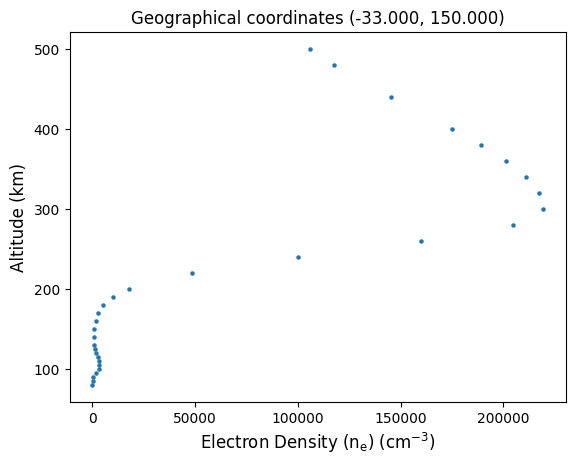

In [ ]:
#--------Vertical TEC profile from IRI2001 model data using 31 altitude points----------------
z = [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 140, 150, 160, 170, 180, 190, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 440, 480, 500]


plt.scatter(electron_density_over_brogans_creek, z, s=5)
plt.xlabel('Electron Density (n$_{\mathrm{e}}$) (cm$^{\mathrm{-3}}$)', fontsize=12)
plt.ylabel('Altitude (km)', fontsize=12)
plt.title('Geographical coordinates (-33.000, 150.000)')
#plt.legend()
#footnote_text = 'IRI2001 data for 2nd July 2023'
#plt.annotate(footnote_text, (0.7, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)

plt.show()

In [ ]:
#----The same process for extracting the data at all altitudes for the antipodal coordinates to brogan's creek (North Atlantic Ocean)----
opposite_brogans_creek = None

for line_no, elements in processed_coordinates:
    if len(elements) >=3 and elements[1] == "33.000" and elements[2] == "-30.000":
      opposite_brogans_creek = line_no
      print(f"Line for opposite brogan's creek: {opposite_brogans_creek}")

ionosphere_data_for_opposite_brogans_creek = []

for altitude in altitude_data:
  processed_altitude = process_text_file(altitude)

  for line_num, elements in processed_altitude:
    if line_num == opposite_brogans_creek:
      ionosphere_data_for_opposite_brogans_creek.append((altitude, elements))

print("Ionosphere Data for Opposite Brogan's Creek (North Atlantic Ocean):")
for altitude, elements in ionosphere_data_for_opposite_brogans_creek:
    print(f"File: {altitude}, elements: {elements}")

Line for opposite brogan's creek: 3525
Ionosphere Data for Opposite Brogan's Creek (North Atlantic Ocean):
File: /content/80km.txt, elements: ['1.0576E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '1.0576E+02', '1.9036E+02', '7.6144E+02', '2.5403E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/85km.txt, elements: ['2.0454E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '4.0908E+02', '6.1362E+02', '1.0227E+03', '2.9213E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/90km.txt, elements: ['1.9875E+04', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '5.9625E+03', '1.1925E+04', '1.9875E+03', '2.5403E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/95km.txt, elements: ['7.0029E+04', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '2.2409E+04', '4.4118E+04', '3.5014E+03', '2.9213E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/100km.txt, elements: ['1.1931E+05', '0.0000E+00', 

In [ ]:
#----Again, same process for extracting the electron density data for the North Atlantic Ocean----
electron_density_over_opposite_brogans_creek = []

for altitude, elements in ionosphere_data_for_opposite_brogans_creek:
  if elements:
    first_element = float(elements[0])
    electron_density_over_opposite_brogans_creek.append(first_element)

print(electron_density_over_opposite_brogans_creek)

TEC_estimation_oppositebroganscreek = sum(electron_density_over_opposite_brogans_creek)
print(f"The TEC estimation using 17 altitude points is: {TEC_estimation_oppositebroganscreek}")

[1057.6, 2045.4, 19875.0, 70029.0, 119310.0, 139580.0, 140840.0, 135990.0, 131310.0, 136600.0, 145360.0, 165400.0, 186870.0, 214930.0, 251280.0, 295740.0, 343210.0, 392560.0, 490820.0, 576000.0, 632190.0, 646620.0, 634550.0, 607560.0, 568830.0, 522260.0, 471720.0, 420580.0, 325930.0, 249210.0, 218210.0]
The TEC estimation using 17 altitude points is: 9256467.0


Integral for North Atlantic Ocean TEC per cm^3

In [ ]:
fivehundredkm_data_opposite_brogans_creek = ionosphere_data_for_opposite_brogans_creek[-1]  # Access the last file's data
fivehundredkm_elements_opposite_brogans_creek = fivehundredkm_data_opposite_brogans_creek[1]  # Extract the list of elements

TEC_at_500km_IRI2001 = float(fivehundredkm_elements_opposite_brogans_creek[8])
print(f"TEC at 500km (IRI2001): {TEC_at_500km_IRI2001}")

TEC at 500km (IRI2001): 9.0342


TEC over opposite Brogan's creek (North Atlantic Ocean) is 9.0342 x 10^16/m^2

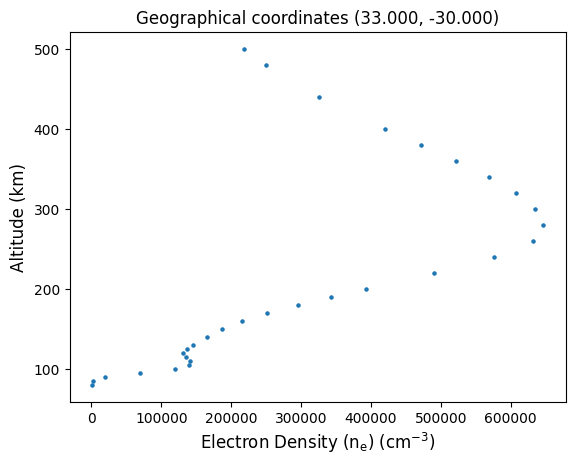

In [ ]:
#----Vertical (zenith) electron density profile over the North Atlantic Ocean (antipodal to Brogan's Creek)----
z = [80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 140, 150, 160, 170, 180, 190, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 440, 480, 500]


plt.scatter(electron_density_over_opposite_brogans_creek, z, s=5)
plt.xlabel('Electron Density (n$_{\mathrm{e}}$) (cm$^{\mathrm{-3}}$)', fontsize = 12)
plt.ylabel('Altitude (km)', fontsize = 12)
plt.title('Geographical coordinates (33.000, -30.000)')
#footnote_text = 'IRI2001 data for 2nd July 2023'
#plt.annotate(footnote_text, (0.7, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)
#plt.legend()
plt.show()

In [ ]:
#----Same extraction of ionosphere data for the Mediterranean sea coordinate-----
mediterranean_sea = None

for line_no, elements in processed_coordinates:
    if len(elements) >=3 and elements[1] == "33.000" and elements[2] == "30.000":
      mediterranean_sea = line_no
      print(f"Line for mediterranean sea: {mediterranean_sea}")

ionosphere_data_for_mediterranean_sea = []

for altitude in altitude_data:
  processed_altitude = process_text_file(altitude)

  for line_num, elements in processed_altitude:
    if line_num == mediterranean_sea:
      ionosphere_data_for_mediterranean_sea.append((altitude, elements))

print("Ionosphere Data for Mediterranean Sea:")
for altitude, elements in ionosphere_data_for_mediterranean_sea:
    print(f"File: {altitude}, elements: {elements}")

Line for mediterranean sea: 7478
Ionosphere Data for Mediterranean Sea:
File: /content/80km.txt, elements: ['1.3873E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '1.3873E+02', '2.4972E+02', '9.9887E+02', '4.2650E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/85km.txt, elements: ['2.8870E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '5.7740E+02', '8.6610E+02', '1.4435E+03', '5.8196E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/90km.txt, elements: ['2.8317E+04', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '8.4952E+03', '1.6990E+04', '2.8317E+03', '4.2650E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/95km.txt, elements: ['9.5043E+04', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '3.0414E+04', '5.9877E+04', '4.7522E+03', '5.8196E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/100km.txt, elements: ['1.5907E+05', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000

In [ ]:
#----Extraction of electron density data for Mediterranean sea-----
electron_density_mediterranean_sea = []

for altitude, elements in ionosphere_data_for_mediterranean_sea:
  if elements:
    first_element = float(elements[0])
    electron_density_mediterranean_sea.append(first_element)

print(electron_density_mediterranean_sea)

TEC_estimation_mediterranean_sea = sum(electron_density_mediterranean_sea)
print(f"The TEC estimation using the integral of 17 altitude points is: {TEC_estimation_mediterranean_sea}")

[1387.3, 2887.0, 28317.0, 95043.0, 159070.0, 182200.0, 185400.0, 179470.0, 178510.0, 187850.0, 196490.0, 219700.0, 237220.0, 262670.0, 293600.0, 329580.0, 361830.0, 385770.0, 513590.0, 685590.0, 868720.0, 1041500.0, 1177300.0, 1250100.0, 1246700.0, 1195100.0, 1107800.0, 997620.0, 757820.0, 546950.0, 461470.0]
The TEC estimation using the integral of 17 altitude points is: 15337254.3


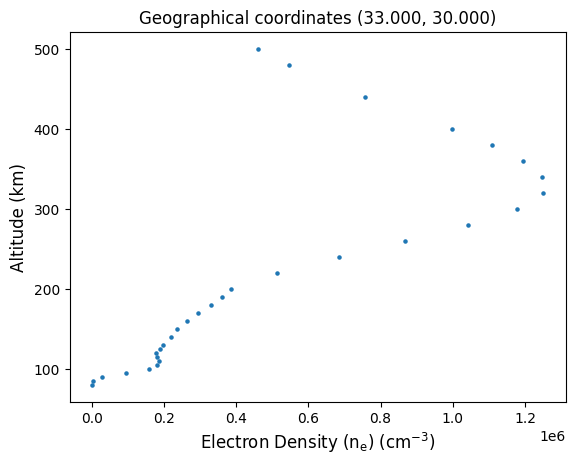

In [ ]:
#---Zenith electron density profile for Mediterranean sea----
plt.scatter(electron_density_mediterranean_sea, z, s=5)
plt.xlabel('Electron Density (n$_{\mathrm{e}}$) (cm$^{\mathrm{-3}}$)', fontsize=12)
plt.ylabel('Altitude (km)',fontsize=12)
plt.title('Geographical coordinates (33.000, 30.000)')
#plt.legend()
#footnote_text = 'IRI2001 data for 2nd July 2023'
#plt.annotate(footnote_text, (0.7, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)
plt.show()

In [ ]:
#----Extracting ionosphere data for South Pacific Ocean coordinate----
SouthPacificOcean = None

for line_no, elements in processed_coordinates:
    if len(elements) >=3 and elements[1] == "-33.000" and elements[2] == "-150.000":
      SouthPacificOcean = line_no
      print(f"Line for South Pacific Ocean: {SouthPacificOcean}")

ionosphere_data_for_SouthPacificOcean = []

for altitude in altitude_data:
  processed_altitude = process_text_file(altitude)

  for line_num, elements in processed_altitude:
    if line_num == SouthPacificOcean:
      ionosphere_data_for_SouthPacificOcean.append((altitude, elements))

print("Ionosphere Data for South Pacific Ocean:")
for altitude, elements in ionosphere_data_for_SouthPacificOcean:
    print(f"File: {altitude}, elements: {elements}")

Line for South Pacific Ocean: 3425
Ionosphere Data for South Pacific Ocean:
File: /content/80km.txt, elements: ['5.1158E-01', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '3.0695E-02', '9.7200E-02', '3.8368E-01', '1.2528E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/85km.txt, elements: ['2.4658E+02', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '4.1918E+01', '1.0603E+02', '9.8630E+01', '1.9452E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/90km.txt, elements: ['4.7240E+02', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '1.0865E+02', '3.1651E+02', '4.7240E+01', '1.2528E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/95km.txt, elements: ['1.9876E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.0000E+00', '3.1802E+02', '1.5702E+03', '9.9380E+01', '1.9452E+01', '-1.0000E+20', '-1.0000E+20', '-1.0000E+20']
File: /content/100km.txt, elements: ['3.1130E+03', '0.0000E+00', '0.0000E+00', '0.0000E+00', '0.

In [ ]:
#---Electron density data extraction for South Pacific Ocean coordinate-----
electron_density_SouthPacificOcean = []

for altitude, elements in ionosphere_data_for_SouthPacificOcean:
  if elements:
    first_element = float(elements[0])
    electron_density_SouthPacificOcean.append(first_element)

print(electron_density_SouthPacificOcean)

TEC_estimation_SouthPacificOcean = sum(electron_density_SouthPacificOcean)
print(f"The TEC estimation using the integral of 17 altitude points is: {TEC_estimation_SouthPacificOcean}")

[0.51158, 246.58, 472.4, 1987.6, 3113.0, 3325.3, 3332.4, 2721.2, 1772.5, 1126.7, 792.38, 644.92, 929.85, 1646.8, 2731.9, 4053.0, 5606.1, 7942.2, 18390.0, 53242.0, 117720.0, 200360.0, 271130.0, 304170.0, 304920.0, 296100.0, 280660.0, 260500.0, 213930.0, 169120.0, 149560.0]
The TEC estimation using the integral of 17 altitude points is: 2682247.34158


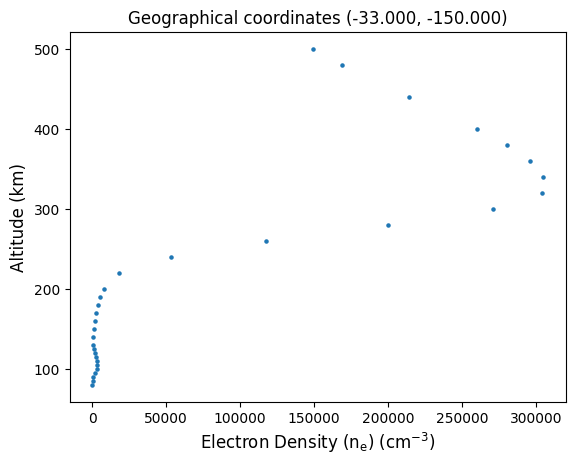

In [ ]:
#----Zenith Electron Density Profile for South Pacific Ocean-----
plt.scatter(electron_density_SouthPacificOcean, z, s=5)
plt.xlabel('Electron Density (n$_{\mathrm{e}}$) (cm$^{\mathrm{-3}}$)', fontsize=12)
plt.ylabel('Altitude (km)', fontsize=12)
plt.title('Geographical coordinates (-33.000, -150.000)')
#plt.legend()
#footnote_text = 'IRI2001 data for 2nd July 2023'
#plt.annotate(footnote_text, (0.7, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)
plt.show()

In [ ]:
import pandas as pd
from scipy.optimize import curve_fit


In [ ]:
#----Hydrogen 2s Orbital function------
def twos_f(r, n, a, b):
  return n*np.exp(-r/a)*(b-r)**2*r**2


In [ ]:
#----Fitting parameters of the 2s function to real electron density profile data----
x_data = np.array(z)
y_data = electron_density_over_brogans_creek

#----non-linear least squares fitting function----
#----popt gives the optimised parameters and pcov is the covariance matrix of the fitted parameters (parameter uncertainities)-----
#----p0 is initial values for the parameters for the fitting function to start from-----
popt, pcov = curve_fit(twos_f, x_data, y_data, p0=[0.004,77,150])
n_opt, a_opt, b_opt = popt

Text(0, -47, 'Non-linear Least Squares method')

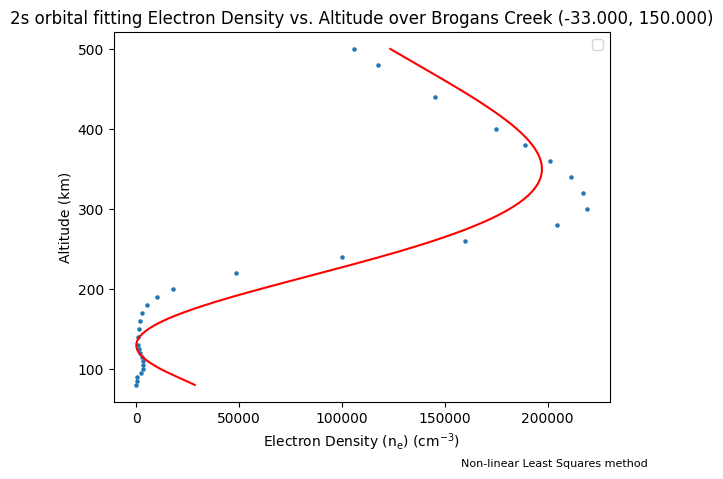

In [ ]:
#---Plot optimised 2s orbital function against IRI2001 model data-----

x_model = np.linspace(min(x_data), max(x_data), 1000)
y_model = twos_f(x_model, n_opt, a_opt, b_opt)

plt.scatter(y_data, x_data, s=5)
plt.plot(y_model, x_model, color = 'r')
plt.xlabel('Electron Density (n$_{\mathrm{e}}$) (cm$^{\mathrm{-3}}$)')
plt.ylabel('Altitude (km)')
plt.title('2s orbital fitting Electron Density vs. Altitude over Brogans Creek (-33.000, 150.000)')
plt.legend()
footnote_text = 'Non-linear Least Squares method'
plt.annotate(footnote_text, (0.7, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)


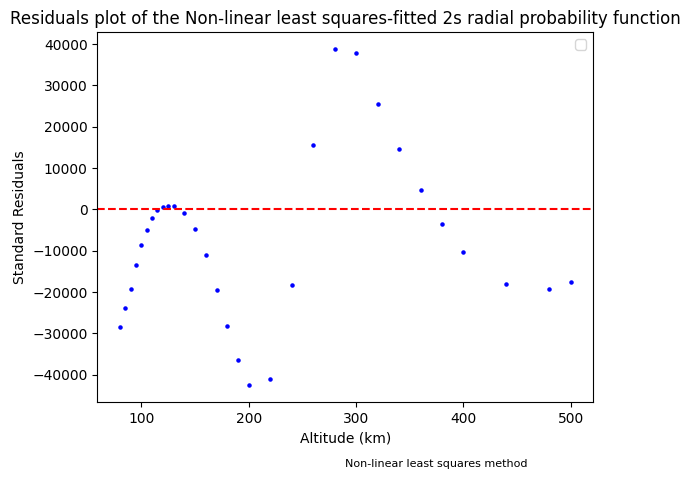

In [ ]:
#----Residuals Plot for the Non-Linear Least Squares Fit-----
residuals_nlls = y_data - twos_f(x_data, n_opt, a_opt, b_opt)

# Create a scatter plot of squared deviations
plt.scatter(x_data, residuals_nlls, s=5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Altitude (km)')
plt.ylabel('Standard Residuals')
plt.title('Residuals plot of the Non-linear least squares-fitted 2s radial probability function')
plt.legend()
footnote_text = 'Non-linear least squares method'
plt.annotate(footnote_text, (0.5, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)

# Show the plot
plt.show()

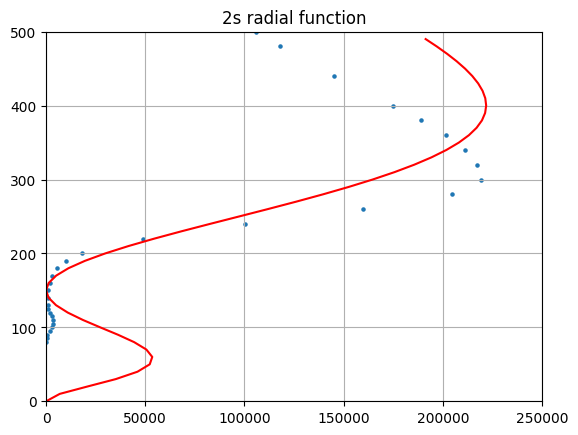

In [ ]:
#----Some manual testing of 2s orbital function parameters-----
y = np.arange(0,500,10)
x = twos_f(y, 0.004,77,150)
# n sets the max value
#b gives the z-value of the minimum
# a depends on b but 70 makes it look pretty good with b at 100
plt.title("2s radial function")
plt.scatter(y_data, x_data, s=5)
plt.plot(x,y, color = 'r')
plt.ylim(0, 500)
plt.xlim(0, 250000)
plt.grid()
plt.show()
# Our 2s function scale is off by about e^8

Optimized Parameters (n, a, b): [5.89220650e-03 6.75663293e+01 1.29635066e+02]


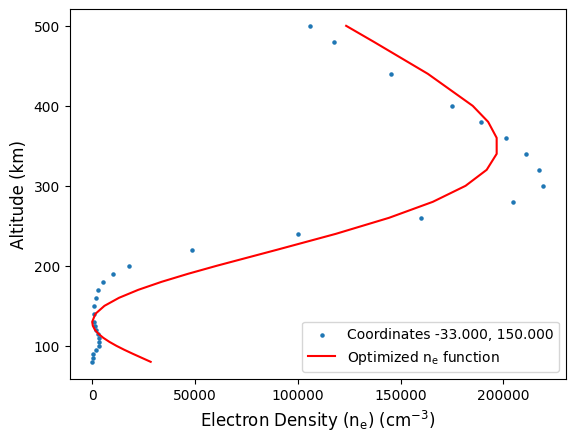

In [ ]:
#----Nelder-Mead Optimisation Method----

from scipy.optimize import minimize

# Define your objective function
def objective(params):
    n, a, b = params
    model_predictions = twos_f(x_data, n, a, b)
    error = np.sum((y_data - model_predictions) ** 2)  # Squared deviation
    return error

# Initial guess for parameters
initial_guess = [0.004, 77, 150]

# Run the Nelder-Mead optimization
result = minimize(objective, initial_guess, method='Nelder-Mead')

# Extract the optimized parameters
optimized_params = result.x
n_opt, a_opt, b_opt = optimized_params

# Evaluate the model with the optimized parameters
optimized_model_predictions = twos_f(x_data, n_opt, a_opt, b_opt)

# Plot the observed data and the optimized model predictions
plt.scatter(y_data, x_data, label='Coordinates -33.000, 150.000', s=5)
plt.plot(optimized_model_predictions, x_data, label='Optimized n$_{\mathrm{e}}$ function', color = 'r')
#plt.title('Proposed n$_{\mathrm{e}}$ function fitted to electron density profile at (-33.000, 150.000)')
plt.xlabel('Electron Density (n$_{\mathrm{e}}$) (cm$^{\mathrm{-3}}$)', fontsize = 12)
plt.ylabel('Altitude (km)', fontsize = 12)
plt.legend()
#footnote_text = 'Nelder-Mead (Amoeba) optimization method'
#plt.annotate(footnote_text, (0.7, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)

print("Optimized Parameters (n, a, b):", optimized_params)


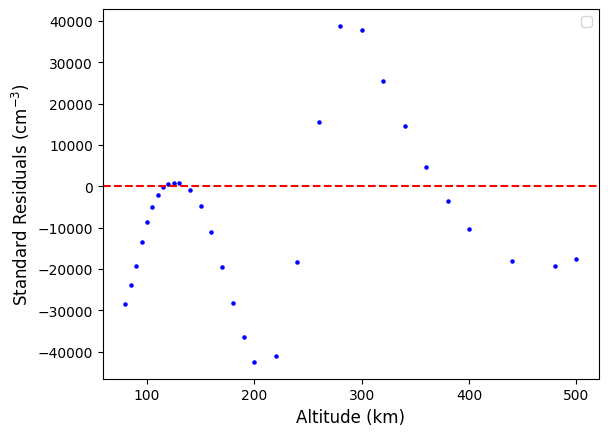

In [ ]:
#---Residuals Plot for Nelder-Mead Fitted function----

residuals = y_data - optimized_model_predictions

# Create a scatter plot of squared deviations
plt.scatter(x_data, residuals, s=5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Altitude (km)', fontsize = 12)
plt.ylabel('Standard Residuals (cm$^{\mathrm{-3}}$)', fontsize = 12)
#plt.title('Residuals plot of the Amoeba-fitted 2s radial probability function')

plt.legend()
#footnote_text = 'Nelder-Mead (Amoeba) optimization method'
#plt.annotate(footnote_text, (0.5, 0), (0, -47), xycoords='axes fraction', textcoords='offset points', fontsize=8)

# Show the plot
plt.show()

In [ ]:
#----Calculation of the Root Mean Square Error of the Nelder-Mead fitted function-----
squared_residuals = residuals**2

meansquaredresiduals = np.mean(squared_residuals)

rmse = np.sqrt(meansquaredresiduals)

print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 21029.37010800863


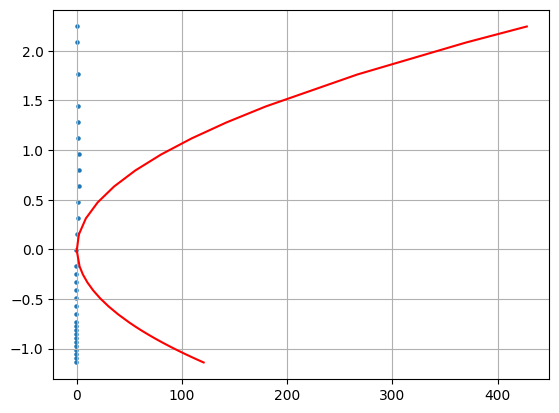

In [ ]:
#---Some initial working to normalize the IRI2001 data before performing optimisation------
#---z-score normalization can help if the parameters have different orders of magnitude-----
def standardize(data):
    mean = np.mean(data)
    std = np.std(data)
    return (data - mean) / std

altitude_normalized = standardize(x_data)
electron_normalized = standardize(y_data)

model = twos_f(altitude_normalized, 0.004,77,150) #I don't know how to change my initial guess after normalizing my data



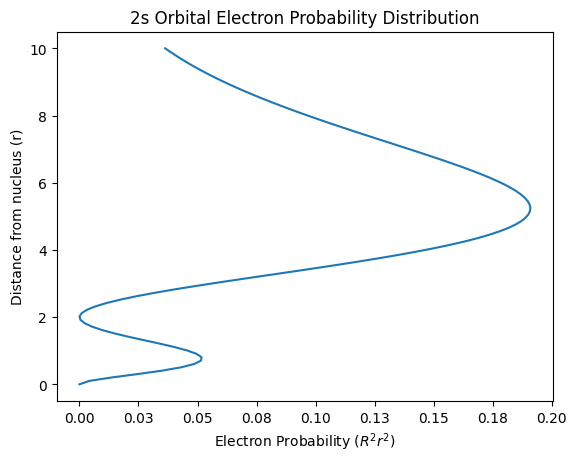

In [ ]:
#----Graphing the hydrogen 2s orbital function-------

from matplotlib.ticker import FuncFormatter

def TwoS_orbital_function(r):
    return ((-1 / (2 * np.sqrt(2))) * np.exp(-r / 2) * (2 - r))**2 * r**2

r_values = np.linspace(0, 10, 100)

y_values = custom_function(r_values)

# Create the plot
plt.plot(y_values, r_values, label='2s Orbital Radial Electron Probability')
plt.ylabel('Distance from nucleus (r)')
plt.xlabel('Electron Probability ($R^2r^2$)')

# Function to display values with two decimal places. x is the tick value and pos is the tick's position in matplotlib
def two_decimal_formatter(x, pos):
    return "{:.2f}".format(x)

# Apply the formatting function to the x-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(two_decimal_formatter))

plt.title('2s Orbital Electron Probability Distribution')

plt.show()



